In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import serial
import datetime

In [5]:
DATA = [127, 0, 254, 254, 0, 0, 0, 254, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 128, 129, 129, 130, 130, 131, 131, 132, 132, 133, 133, 134, 134, 135, 135, 136, 136, 137, 137, 138, 138, 139, 139, 140, 140, 141, 141, 142, 142, 143, 143, 144, 144, 145, 145, 146, 146, 147, 147, 148, 148, 149, 149, 150, 150, 151, 151, 152, 152, 153, 153, 154, 154, 155, 155, 156, 156, 157, 157, 158, 158, 159, 159, 160, 160, 161, 161, 162, 162, 163, 163, 164, 164, 165, 165, 166, 166, 167, 167, 168, 168, 169, 169, 170, 170, 171, 171, 172, 172, 173, 173, 174, 174, 175, 175, 176, 176, 177, 177, 178, 178, 179, 179, 180, 180, 181, 181, 182, 182, 183, 183, 184, 184, 185, 185, 186, 186, 187, 187, 188, 188, 189, 189, 190, 190, 191, 191, 192, 192, 193, 193, 194, 194, 195, 195, 196, 196, 197, 197, 198, 198, 199, 199, 200, 200, 201, 201, 202, 202, 203, 203, 204, 204, 205, 205, 206, 206, 207, 207, 208, 208, 209, 209, 210, 210, 211, 211, 212, 212, 213, 213, 214, 214, 215, 215, 216, 216, 217, 217, 218, 218, 219, 219, 220, 220, 221, 221, 222, 222, 223, 223, 224, 224, 225, 225, 226, 226, 227, 227, 228, 228, 229, 229, 230, 230, 231, 231, 232, 232, 233, 233, 234, 234, 235, 235, 236, 236, 237, 237, 238, 238, 239, 239, 240, 240, 241, 241, 242, 242, 243, 243, 244, 244, 245, 245, 246, 246, 247, 247, 248, 248, 249, 249, 250, 250, 251, 251, 252, 252, 253, 253, 254, 254, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 126, 125, 125, 124, 124, 123, 123, 122, 122, 121, 121, 120, 120, 119, 119, 118, 118, 117, 117, 116, 116, 115, 115, 114, 114, 113, 113, 112, 112, 111, 111, 110, 110, 109, 109, 108, 108, 107, 107, 106, 106, 105, 105, 104, 104, 103, 103, 102, 102, 101, 101, 100, 100, 99, 99, 98, 98, 97, 97, 96, 96, 95, 95, 94, 94, 93, 93, 92, 92, 91, 91, 90, 90, 89, 89, 88, 88, 87, 87, 86, 86, 85, 85, 84, 84, 83, 83, 82, 82, 81, 81, 80, 80, 79, 79, 78, 78, 77, 77, 76, 76, 75, 75, 74, 74, 73, 73, 72, 72, 71, 71, 70, 70, 69, 69, 68, 68, 67, 67, 66, 66, 65, 65, 64, 64, 63, 63, 62, 62, 61, 61, 60, 60, 59, 59, 58, 58, 57, 57, 56, 56, 55, 55, 54, 54, 53, 53, 52, 52, 51, 51, 50, 50, 49, 49, 48, 48, 47, 47, 46, 46, 45, 45, 44, 44, 43, 43, 42, 42, 41, 41, 40, 40, 39, 39, 38, 38, 37, 37, 36, 36, 35, 35, 34, 34, 33, 33, 32, 32, 31, 31, 30, 30, 29, 29, 28, 28, 27, 27, 26, 26, 25, 25, 24, 24, 23, 23, 22, 22, 21, 21, 20, 20, 19, 19, 18, 18, 17, 17, 16, 16, 15, 15, 14, 14, 13, 13, 12, 12, 11, 11, 10, 10, 9, 9, 8, 8, 7, 7, 6, 6, 5, 5, 4, 4, 3, 3, 2, 2, 1, 1, 0, 0, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 135, 135, 135, 135, 119, 119, 119, 119, 143, 143, 143, 143, 111, 111, 111, 111, 151, 151, 151, 151, 103, 103, 103, 103, 159, 159, 159, 159, 95, 95, 95, 95, 167, 167, 167, 167, 87, 87, 87, 87, 175, 175, 175, 175, 79, 79, 79, 79, 183, 183, 183, 183, 71, 71, 71, 71, 191, 191, 191, 191, 63, 63, 63, 63, 199, 199, 199, 199, 55, 55, 55, 55, 207, 207, 207, 207, 47, 47, 47, 47, 215, 215, 215, 215, 39, 39, 39, 39, 223, 223, 223, 223, 31, 31, 31, 31, 231, 231, 231, 231, 23, 23, 23, 23, 239, 239, 239, 239, 15, 15, 15, 15, 247, 247, 247, 247, 7, 7, 7, 7, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 135, 135, 119, 119, 143, 143, 111, 111, 151, 151, 103, 103, 159, 159, 95, 95, 167, 167, 87, 87, 175, 175, 79, 79, 183, 183, 71, 71, 191, 191, 63, 63, 199, 199, 55, 55, 207, 207, 47, 47, 215, 215, 39, 39, 223, 223, 31, 31, 231, 231, 23, 23, 239, 239, 15, 15, 247, 247, 7, 7, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 125, 125, 125, 126, 126, 125, 126, 126, 125, 126, 126, 125, 126, 126, 126, 126, 126, 125, 126, 126, 126, 126, 125, 126, 126, 125, 126, 126, 125, 126, 126, 125, 126, 126, 125, 126, 126, 125, 125, 126, 125, 126, 125, 126, 126, 126, 125, 126, 126, 126, 126, 126, 126, 125, 126, 126, 125, 125, 125, 126, 126, 126, 125, 125, 126, 125, 125, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 125, 126, 125, 126, 126, 126, 126, 126, 126, 125, 126, 126, 126, 126, 125, 126, 126, 125, 126, 126, 126, 126, 125, 126, 125, 125, 126, 125, 126, 125, 126, 125, 126, 126, 125, 125, 126, 125, 125, 126, 125, 126, 126, 125, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 125, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 125, 127, 126, 126, 126, 125, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 125, 125, 126, 126, 126, 125, 126, 126, 126, 126, 126, 126, 125, 126, 126, 125, 126, 126, 126, 125, 126, 126, 126, 125, 126, 126, 126, 125, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 125, 126, 126, 125, 126, 126, 126, 126, 126, 126, 126, 126, 125, 125, 125, 126, 126, 126, 126, 125, 126, 126, 126, 126, 126, 125, 126, 126, 126, 126, 126, 126, 125, 126, 126, 126, 126, 125, 125, 126, 126, 125, 125, 125, 126, 126, 126, 126, 125, 126, 126, 126, 126, 126, 126, 126, 127, 126, 126, 126, 126, 125, 125, 126, 126, 125, 126, 126, 125, 126, 126, 126, 126, 126, 126, 125, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 125, 126, 126, 126, 125, 126, 126, 126, 125, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 125, 126, 125, 126, 126, 126, 126, 126, 125, 126, 126, 125, 126, 126, 126, 126, 125, 125, 126, 126, 126, 126, 125, 126, 126, 126, 126, 126, 126, 126, 125, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 125, 126, 126, 126, 126, 126, 127, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 127, 126, 126, 126, 126, 126, 127, 125, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 127, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 127, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 127, 126, 126, 126, 126, 126, 126, 126, 126, 126, 127, 127, 126, 126, 126, 126, 125, 126, 126, 126, 126, 126, 126, 126, 126, 126, 127, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 127, 126, 126, 126, 126, 126, 126, 125, 126, 126, 126, 126, 126, 126, 126, 126, 127, 126, 126, 126, 127, 127, 127, 128, 129, 128, 128, 127, 126, 124, 122, 120, 119, 117, 117, 117, 119, 123, 128, 134, 138, 142, 144, 144, 143, 138, 133, 125, 119, 113, 109, 106, 107, 109, 115, 121, 127, 133, 137, 140, 141, 138, 135, 130, 125, 121, 118, 117, 118, 122, 125, 130, 135, 137, 137, 134, 130, 123, 116, 110, 105, 103, 105, 110, 118, 128, 139, 149, 154, 156, 155, 154, 150, 133, 121, 109, 101, 98, 97, 97, 98, 100, 104, 123, 130, 140, 147, 153, 156, 160, 163, 166, 168, 168, 166, 162, 153, 142, 112, 77, 63, 51, 34, 35, 44, 63, 89, 112, 123, 125, 224, 253, 255, 246, 223, 192, 159, 135, 130, 129, 88, 19, 21, 33, 54, 80, 105, 121, 124, 125, 137, 209, 202, 192, 178, 162, 146, 135, 130, 129, 116, 71, 74, 78, 84, 93, 102, 111, 118, 130, 175, 175, 175, 171, 165, 156, 147, 136, 113, 85, 82, 79, 80, 84, 91, 99, 109, 122, 152, 169, 171, 173, 171, 166, 161, 154, 145, 130, 102, 94, 89, 88, 88, 91, 96, 101, 107, 131, 144, 153, 156, 156, 155, 153, 147, 136, 129, 123, 120, 118, 119, 123, 127, 131, 134, 136, 135, 134, 130, 124, 119, 113, 108, 105, 103, 103, 105, 110, 116, 124, 132, 140, 147, 152, 154, 155, 154, 153, 150, 143, 128, 116, 105, 100, 99, 97, 97, 99, 102, 117, 126, 136, 142, 145, 146, 142, 139, 134, 131, 128, 126, 126, 128, 131, 134, 135, 135, 133, 129, 124, 118, 113, 109, 108, 109, 112, 117, 123, 130, 136, 140, 141, 141, 139, 135, 131, 126, 121, 119, 118, 118, 120, 122, 125, 127, 129, 130, 130, 129, 129, 128, 128, 128, 129, 130, 130, 129, 128, 127, 123, 120, 118, 116, 115, 116, 118, 121, 126, 132, 137, 141, 142, 143, 141, 136, 132, 125, 119, 116, 113, 112, 113, 115, 119, 124, 127, 130, 132, 133, 133, 131, 130, 128, 127, 126, 125, 127, 128, 129, 129, 130, 129, 129, 128, 125, 123, 122, 121, 120, 121, 123, 124, 127, 130, 131, 133, 133, 133, 131, 129, 126, 124, 122, 120, 118, 118, 120, 121, 124, 127, 130, 132, 134, 134, 134, 134, 132, 130, 128, 125, 122, 121, 119, 119, 120, 121, 123, 125, 127, 130, 131, 132, 132, 132, 132, 130, 129, 127, 125, 123, 122, 121, 120, 121, 122, 123, 124, 126, 127, 128, 130, 130, 131, 131, 130, 130, 129, 127, 126, 126, 125, 124, 123, 124, 124, 125, 125, 125, 126, 127, 128, 129, 129, 129, 128, 128, 127, 126, 125, 125, 124, 123, 124, 124, 124, 126, 126, 127, 128, 129, 129, 130, 130, 130, 129, 128, 127, 126, 125, 125, 125, 124, 124, 124, 124, 125, 126, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 126, 127, 128, 128, 129, 129, 129, 130, 130, 130, 128, 128, 128, 127, 126, 124, 124, 123, 124, 123, 124, 123, 124, 124, 125, 126, 126, 126, 127, 127, 127, 128, 128, 128, 129, 129, 129, 129, 128, 127, 126, 126, 125, 125, 124, 125, 126, 127, 128, 129, 129, 130, 131, 129, 129, 128, 126, 125, 124, 123, 122, 122, 122, 124, 124, 127, 128, 129, 130, 130, 130, 129, 129, 128, 127, 125, 124, 124, 123, 124, 124, 124, 126, 127, 128, 129, 129, 130, 129, 128, 128, 128, 127, 127, 126, 126, 126, 125, 126, 126, 126, 127, 127, 127, 127, 127, 127, 127, 126, 126, 126, 126, 126, 125, 125, 125, 126, 126, 126, 126, 126, 127, 128, 129, 129, 129, 130, 131, 130, 130, 130, 129, 128, 127, 126, 125, 123, 123, 122, 122, 121, 122, 122, 124, 125, 123, 127, 128, 130, 130, 130, 130, 130, 129, 128, 128, 126, 126, 125, 125, 125, 125, 126, 126, 127, 127, 128, 128, 127, 128, 127, 127, 126, 125, 125, 125, 124, 125, 125, 125, 127, 127, 128, 129, 128, 129, 129, 128, 128, 128, 127, 126, 126, 125, 125, 125, 125, 125, 125, 126, 126, 127, 127, 127, 127, 127, 128, 126, 127, 126, 127, 127, 126, 127, 126, 126, 127, 127, 127, 127, 127, 128, 127, 127, 126, 126, 126, 125, 126, 126, 125, 126, 126, 126, 126, 126, 127, 126, 126, 127, 126, 126, 126, 126, 127, 126, 126, 126, 126, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 127, 128, 128, 128, 128, 128, 128, 128, 128, 127, 127, 126, 126, 126, 125, 124, 125, 125, 124, 125, 125, 125, 125, 125, 125, 125, 126, 126, 126, 125, 126, 126, 126, 126, 125, 126, 126, 127, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 127, 127, 127, 127, 126, 126, 126, 126, 126, 126, 125, 126, 126, 126, 126, 126, 126, 126, 126, 127, 127, 127, 128, 128, 128, 129, 129, 129, 129, 129, 128, 128, 127, 127, 123, 127, 126, 125, 125, 125, 125, 126, 126, 126, 126, 125, 125, 125, 125, 124, 125, 125, 125, 125, 125, 126, 127, 128, 128, 129, 129, 129, 129, 128, 128, 127, 127, 126, 126, 126, 126, 126, 126, 127, 127, 127, 128, 128, 128, 127, 128, 127, 127, 127, 126, 126, 126, 126, 126, 123, 127, 127, 127, 126, 127, 127, 127, 127, 123, 127, 126, 126, 126, 125, 125, 126, 125, 126, 126, 127, 127, 128, 128, 128, 128, 128, 128, 127, 127, 127, 127, 126, 126, 126, 126, 126, 126, 126, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 126, 126, 126, 127, 126, 126, 126, 127, 127, 127, 127, 127, 127, 127, 127, 126, 126, 127, 126, 126, 127, 126, 126, 126, 126, 127, 127, 127, 127, 128, 128, 127, 127, 127, 127, 126, 126, 126, 126, 126, 126, 126, 126, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 126, 126, 125, 126, 126, 125, 126, 126, 126, 127, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 126, 126, 125, 125, 126, 125, 125, 125, 125, 126, 126, 127, 126, 127, 127, 127, 128, 128, 128, 128, 128, 128, 128, 127, 128, 127, 127, 127, 127, 126, 126, 126, 126, 125, 126, 126, 126, 126, 126, 127, 125, 127, 127, 127, 127, 128, 128, 127, 127, 127, 127, 127, 126, 127, 127, 123, 127, 126, 127, 123, 127, 127, 127, 127, 127, 128, 127, 126, 127, 127, 127, 126, 126, 126, 126, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 126, 127, 127, 127, 126, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 127, 128, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 126, 127, 126, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 126, 127, 127, 126, 127, 127, 127, 127, 126, 127, 126, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 126, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 126, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 126, 127, 126, 126, 126, 126, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 126, 127, 127, 127, 126, 126, 127, 127, 127, 127, 126, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 126, 126, 126, 126, 127, 123, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 126, 126, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 126, 126, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 126, 126, 127, 126, 126, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 128, 127, 127, 126, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 126, 127, 127, 127, 126, 126, 127, 126, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 128, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 126, 126, 126, 126, 126, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 126, 127, 126, 127, 127, 127, 126, 127, 126, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 126, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 128, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 128, 127, 127, 127, 128, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 126, 126, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 126, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 128, 128, 128, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 128, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 126, 126, 127, 127, 127, 126, 126, 127, 128, 127, 128, 127, 127, 128, 128, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 127, 128, 127, 127, 127, 128, 128, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 127, 128, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 128, 127, 128, 127, 127, 127, 127, 127, 127, 128, 127, 127, 128, 128, 128, 128, 127, 128, 127, 127, 126, 126, 126, 126, 126, 127, 127, 127, 128, 128, 128, 128, 127, 127, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 126, 127, 126, 126, 127, 127, 128, 129, 129, 129, 129, 128, 128, 127, 127, 126, 126, 126, 126, 126, 126, 126, 126, 127, 127, 127, 126, 126, 126, 125, 122, 127, 128, 129, 130, 133, 134, 136, 137, 136, 135, 132, 128, 122, 117, 113, 109, 106, 106, 108, 112, 118, 126, 133, 141, 147, 150, 152, 151, 148, 142, 136, 130, 123, 117, 113, 110, 109, 110, 111, 113, 116, 119, 122, 125, 129, 133, 138, 142, 147, 151, 153, 153, 152, 149, 139, 128, 115, 103, 97, 94, 92, 92, 94, 99, 104, 111, 141, 157, 162, 164, 165, 164, 160, 155, 149, 143, 117, 104, 100, 99, 99, 100, 103, 113, 118, 122, 123, 121, 117, 112, 106, 102, 101, 102, 113, 128, 146, 161, 171, 179, 184, 185, 181, 173, 161, 149, 137, 125, 60, 56, 46, 44, 53, 69, 89, 108, 120, 124, 143, 207, 214, 209, 197, 179, 159, 142, 132, 129, 101, 60, 60, 62, 74, 90, 104, 114, 121, 129, 184, 181, 179, 173, 164, 155, 147, 137, 120, 96, 98, 100, 105, 125, 134, 140, 140, 134, 122, 109, 99, 93, 90, 89, 91, 95, 101, 108, 140, 158, 163, 166, 167, 165, 163, 159, 154, 150, 145, 122, 114, 106, 101, 98, 95, 93, 91, 90, 91, 94, 99, 104, 115, 144, 164, 171, 176, 179, 177, 173, 165, 156, 146, 135, 111, 85, 84, 81, 83, 87, 93, 99, 106, 115, 142, 151, 154, 154, 152, 151, 142, 138, 135, 134, 134, 136, 138, 140, 141, 140, 138, 134, 128, 122, 115, 108, 103, 100, 99, 99, 99, 101, 103, 109, 118, 126, 133, 141, 148, 152, 156, 158, 159, 158, 158, 156, 153, 150, 142, 123, 109, 100, 96, 93, 92, 92, 94, 97, 101, 106, 134, 144, 154, 158, 160, 159, 157, 156, 152, 149, 129, 123, 117, 112, 109, 109, 110, 113, 116, 119, 123, 125, 127, 128, 128, 127, 126, 124, 123, 122, 121, 121, 121, 122, 125, 128, 131, 134, 137, 140, 142, 143, 143, 142, 140, 136, 131, 126, 122, 117, 112, 110, 109, 109, 111, 114, 118, 123, 127, 132, 136, 140, 141, 141, 141, 139, 137, 134, 131, 128, 126, 123, 122, 120, 119, 120, 120, 121, 122, 123, 125, 126, 128, 129, 130, 131, 132, 132, 132, 130, 130, 129, 128, 126, 126, 126, 126, 126, 126, 127, 126, 127, 128, 127, 127, 126, 126, 126, 125, 125, 125, 124, 125, 126, 127, 127, 129, 130, 130, 131, 132, 132, 131, 131, 131, 129, 128, 126, 125, 124, 123, 123, 122, 123, 123, 124, 125, 126, 127, 128, 128, 128, 129, 128, 128, 128, 127, 127, 127, 127, 128, 128, 129, 129, 129, 130, 130, 129, 129, 128, 128, 127, 126, 125, 124, 124, 123, 124, 124, 125, 126, 126, 128, 129, 130, 130, 131, 132, 131, 130, 129, 128, 128, 127, 126, 126, 126, 125, 125, 125, 126, 126, 127, 126, 126, 126, 127, 126, 126, 126, 127, 127, 127, 128, 128, 128, 128, 128, 128, 128, 129, 128, 128, 129, 129, 128, 127, 127, 127, 127, 126, 126, 126, 126, 126, 126, 127, 127, 127, 127, 127, 127, 127, 127, 128, 128, 128, 129, 129, 130, 130, 131, 130, 129, 128, 128, 126, 125, 124, 124, 123, 122, 123, 124, 124, 126, 128, 128, 129, 129, 129, 129, 129, 129, 129, 128, 127, 128, 128, 128, 129, 129, 129, 129, 129, 128, 128, 127, 126, 126, 125, 124, 124, 125, 125, 126, 126, 127, 128, 128, 129, 129, 129, 130, 129, 129, 128, 128, 128, 127, 126, 125, 124, 125, 125, 125, 126, 127, 128, 129, 130, 130, 131, 132, 131, 131, 130, 128, 128, 126, 125, 123, 123, 122, 123, 123, 123, 124, 125, 125, 127, 128, 129, 129, 130, 131, 131, 131, 131, 131, 131, 130, 130, 129, 128, 127, 127, 125, 125, 124, 124, 123, 124, 124, 125, 125, 126, 127, 127, 128, 128, 129, 128, 129, 128, 128, 128, 128, 128, 128, 129, 129, 129, 128, 128, 128, 127, 127, 125, 125, 125, 125, 125, 126, 127, 127, 128, 129, 129, 129, 129, 128, 127, 126, 125, 124, 124, 124, 125, 125, 126, 128, 129, 130, 131, 132, 132, 131, 131, 131, 129, 129, 127, 125, 125, 124, 123, 124, 123, 123, 124, 125, 126, 127, 128, 128, 129, 130, 130, 129, 129, 128, 127, 127, 126, 125, 125, 126, 126, 126, 127, 128, 129, 129, 130, 130, 130, 129, 129, 128, 128, 127, 126, 126, 126, 125, 125, 125, 125, 126, 126, 126, 127, 126, 126, 127, 127, 127, 127, 127, 127, 128, 129, 129, 130, 130, 130, 130, 130, 129, 129, 128, 127, 126, 125, 124, 124, 123, 124, 123, 124, 125, 125, 126, 128, 128, 130, 131, 131, 131, 131, 131, 131, 130, 129, 128, 127, 126, 125, 124, 124, 125, 124, 125, 125, 125, 126, 127, 128, 128, 129, 129, 129, 129, 128, 128, 128, 127, 127, 127, 127, 127, 128, 128, 128, 128, 128, 128, 128, 128, 129, 129, 128, 128, 129, 128, 128, 127, 128, 128, 127, 127, 127, 126, 126, 125, 126, 125, 125, 125, 125, 127, 127, 128, 129, 130, 130, 130, 131, 130, 130, 130, 128, 128, 127, 126, 126, 125, 125, 125, 126, 126, 127, 127, 127, 128, 128, 129, 128, 128, 128, 128, 127, 127, 126, 127, 126, 127, 126, 126, 127, 127, 128, 128, 128, 129, 129, 128, 128, 129, 129, 128, 128, 128, 128, 127, 127, 127, 126, 126, 126, 126, 126, 127, 127, 127, 127, 127, 128, 127, 127, 128, 127, 127, 127, 127, 127, 127, 128, 128, 128, 128, 128, 128, 128, 128, 129, 128, 128, 127, 127, 127, 127, 126, 126, 125, 126, 126, 127, 127, 127, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 128, 128, 127, 129, 128, 128, 128, 127, 128, 128, 127, 127, 127, 127, 127, 127, 126, 127, 128, 127, 128, 128, 128, 128, 128, 128, 128, 128, 127, 127, 127, 127, 126, 126, 126, 127, 127, 127, 127, 127, 128, 128, 129, 129, 128, 128, 128, 128, 128, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 128, 128, 127, 128, 128, 128, 128, 128, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 127, 128, 127, 127, 127, 127, 127, 126, 127, 127, 127, 127, 127, 127, 127, 128, 128, 128, 128, 129, 128, 128, 129, 128, 128, 128, 127, 127, 127, 127, 127, 127, 126, 126, 127, 127, 127, 127, 128, 128, 128, 129, 128, 128, 128, 128, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 127, 128, 127, 128, 128, 128, 128, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 128, 127, 127, 128, 127, 128, 128, 128, 128, 128, 128, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 128, 127, 127, 127, 128, 127, 127, 127, 127, 127, 128, 128, 128, 128, 128, 128, 128, 127, 128, 128, 128, 128, 128, 128, 128, 127, 127, 127, 128, 128, 127, 128, 128, 128, 128, 128, 129, 128, 128, 128, 127, 128, 127, 127, 127, 127, 128, 127, 128, 128, 128, 127, 127, 127, 127, 127, 127, 127, 128, 127, 127, 128, 127, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 127, 128, 127, 127, 128, 127, 128, 128, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 128, 128, 128, 128, 128, 129, 129, 129, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 128, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 127, 127, 128, 128, 128, 128, 127, 128, 127, 128, 128, 128, 126, 125, 126, 126, 128, 127, 128, 127, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 127, 127, 128, 127, 127, 127, 127, 127, 127, 128, 128, 128, 127, 128, 129, 128, 128, 128, 128, 129, 128, 128, 128, 128, 128, 127, 127, 127, 128, 127, 127, 127, 127, 128, 126, 128, 128, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 128, 127, 128, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 129, 128, 128, 128, 128, 128, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 128, 128, 128, 129, 128, 129, 129, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 127, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 127, 127, 127, 128, 128, 128, 127, 128, 128, 128, 128, 128, 128, 128, 127, 127, 128, 127, 127, 128, 127, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 129, 128, 128, 129, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 128, 128, 128, 127, 127, 127, 128, 127, 128, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 128, 128, 128, 128, 128, 128, 128, 128, 127, 127, 127, 127, 127, 127, 128, 127, 128, 128, 128, 128, 129, 129, 128, 129, 129, 129, 129, 128, 128, 128, 128, 128, 128, 128, 127, 128, 128, 128, 127, 128, 128, 128, 127, 128, 128, 128, 128, 128, 128, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 128, 128, 128, 128, 127, 128, 127, 128, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 128, 129, 128, 128, 128, 128, 128, 128, 128, 127, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 129, 128, 128, 128, 128, 129, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 129, 129, 128, 129, 129, 129, 128, 129, 128, 128, 128, 128, 128, 128, 128, 127, 127, 128, 128, 128, 128, 128, 129, 128, 128, 128, 128, 128, 128, 129, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 128, 128, 128, 128, 129, 128, 128, 128, 128, 128, 128, 128, 128, 129, 128, 128, 129, 128, 128, 128, 128, 128, 127, 128, 127, 128, 128, 128, 128, 128, 128, 128, 129, 129, 128, 128, 128, 129, 128, 128, 128, 128, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 127, 128, 129, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 129, 128, 128, 128, 129, 128, 128, 129, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 128, 128, 128, 128, 128, 128, 128, 127, 128, 128, 128, 128, 128, 128, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 128, 128, 127, 128, 128, 129, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 128, 128, 128, 128, 128, 128, 128, 127, 129, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 128, 129, 128, 128, 128, 128, 129, 128, 128, 128, 128, 127, 128, 127, 128, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 128, 129, 129, 128, 129, 128, 128, 128, 128, 128, 128, 128, 129, 129, 128, 129, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 128, 128, 128, 128, 129, 128, 129, 128, 128, 128, 129, 128, 129, 128, 128, 129, 128, 129, 128, 128, 128, 128, 129, 128, 128, 128, 128, 128, 127, 128, 128, 128, 128, 128, 128, 128, 129, 128, 128, 128, 128, 128, 128, 128, 127, 128, 128, 128, 129, 128, 128, 128, 129, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 128, 129, 129, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 128, 128, 128, 129, 128, 129, 129, 128, 128, 129, 128, 128, 128, 128, 128, 128, 128, 127, 128, 127, 127, 127, 128, 129, 128, 128, 128, 128, 128, 129, 128, 128, 129, 128, 128, 128, 128, 129, 129, 128, 128, 129, 129, 129, 128, 129, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 129, 129, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 127, 128, 128, 128, 128, 128, 128, 129, 128, 128, 128, 128, 128, 128, 129, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 128, 128, 128, 128, 128, 128, 128, 129, 128, 129, 128, 128, 127, 128, 128, 128, 128, 128, 128, 129, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 128, 128, 128, 128, 129, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 129, 128, 128, 128, 128, 128, 129, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 128, 128, 128, 128, 128, 129, 128, 129, 129, 129, 129, 129, 129, 129, 129, 128, 128, 129, 128, 128, 128, 128, 128, 128, 128, 129, 129, 128, 129, 128, 129, 128, 128, 129, 128, 128, 127, 128, 128, 128, 128, 128, 128, 128, 129, 128, 128, 128, 128, 128, 129, 128, 129, 128, 129, 128, 128, 128, 128, 129, 128, 128, 129, 129, 129, 129, 129, 129, 129, 129, 128, 129, 129, 128, 129, 128, 128, 128, 129, 129, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128, 128, 127, 127, 127, 127, 127, 127, 128, 127, 127, 128, 128, 129, 129, 130, 130, 130, 130, 130, 129, 128, 129, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 130, 129, 129, 129, 128, 127, 126, 125, 124, 123, 124, 124, 125, 126, 128, 130, 131, 132, 133, 132, 132, 131, 131, 129, 128, 127, 127, 123, 127, 127, 127, 128, 128, 128, 127, 127, 125, 125, 125, 124, 125, 125, 128, 130, 132, 134, 136, 137, 138, 138, 136, 134, 131, 128, 125, 122, 119, 118, 117, 117, 118, 120, 121, 123, 125, 128, 131, 134, 136, 138, 140, 140, 141, 140, 138, 135, 131, 126, 121, 116, 110, 106, 104, 103, 106, 110, 117, 125, 135, 147, 154, 158, 160, 160, 159, 157, 153, 149, 126, 113, 101, 97, 94, 92, 93, 95, 99, 102, 107, 132, 142, 151, 155, 157, 157, 157, 155, 153, 151, 145, 134, 126, 119, 114, 109, 107, 106, 106, 108, 111, 115, 120, 125, 130, 134, 136, 137, 137, 135, 133, 132, 131, 132, 133, 135, 139, 143, 146, 148, 147, 145, 137, 130, 120, 109, 101, 97, 95, 95, 96, 100, 104, 133, 151, 160, 166, 170, 171, 170, 165, 158, 149, 137, 103, 84, 75, 69, 67, 69, 76, 85, 97, 109, 118, 129, 191, 193, 199, 204, 198, 186, 171, 155, 143, 134, 130, 110, 64, 65, 66, 70, 78, 89, 99, 107, 114, 121, 150, 174, 175, 175, 172, 168, 163, 156, 149, 143, 117, 103, 96, 92, 90, 89, 89, 90, 93, 97, 101, 106, 121, 141, 152, 156, 159, 160, 160, 160, 159, 157, 157, 156, 156, 154, 153, 151, 144, 132, 121, 110, 101, 95, 92, 89, 89, 91, 93, 98, 104, 113, 142, 157, 161, 164, 164, 163, 159, 154, 148, 137, 110, 97, 94, 91, 91, 93, 96, 102, 107, 134, 146, 154, 157, 158, 159, 158, 156, 153, 150, 132, 126, 120, 117, 115, 115, 116, 118, 120, 123, 125, 127, 127, 126, 125, 124, 122, 120, 121, 121, 123, 125, 128, 131, 135, 138, 142, 144, 145, 145, 143, 141, 138, 135, 130, 127, 123, 119, 116, 113, 112, 112, 111, 111, 108, 110, 115, 117, 125, 126, 131, 134, 138, 142, 143, 145, 145, 146, 144, 143, 140, 137, 132, 127, 122, 115, 110, 106, 103, 102, 102, 106, 112, 120, 130, 138, 147, 153, 155, 156, 157, 155, 153, 151, 147, 133, 126, 121, 115, 112, 110, 108, 108, 108, 108, 109, 111, 113, 116, 119, 123, 128, 133, 137, 141, 144, 146, 147, 146, 144, 141, 138, 134, 129, 127, 123, 121, 120, 118, 118, 119, 120, 120, 120, 122, 122, 123, 124, 125, 127, 128, 129, 132, 134, 136, 138, 140, 140, 141, 141, 139, 137, 135, 132, 129, 126, 123, 121, 119, 117, 116, 117, 117, 118, 119, 121, 123, 127, 129, 132, 134, 137, 139, 140, 140, 140, 138, 136, 134, 131, 128, 125, 123, 120, 119, 118, 118, 120, 121, 123, 124, 127, 128, 129, 130, 130, 130, 130, 130, 129, 130, 130, 130, 132, 132, 133, 133, 133, 133, 131, 130, 129, 127, 126, 124, 124, 123, 123, 124, 124, 126, 127, 128, 129, 130, 130, 131, 131, 130, 130, 130, 130, 130, 130, 130, 131, 130, 130, 130, 129, 129, 128, 126, 125, 124, 124, 123, 123, 123, 123, 125, 127, 128, 130, 131, 133, 134, 135, 134, 134, 133, 132, 131, 129, 128, 127, 126, 125, 126, 126, 127, 128, 128, 129, 129, 129, 129, 128, 127, 127, 126, 125, 125, 125, 125, 127, 128, 130, 132, 133, 134, 135, 135, 135, 134, 133, 131, 130, 127, 125, 124, 123, 121, 121, 121, 122, 122, 124, 125, 127, 129, 130, 131, 132, 132, 132, 132, 131, 130, 130, 130, 129, 130, 130, 130, 130, 131, 132, 132, 133, 132, 132, 131, 130, 128, 127, 125, 125, 123, 122, 122, 123, 123, 124, 124, 125, 127, 128, 129, 129, 130, 132, 131, 131, 131, 130, 129, 129, 128, 128, 127, 126, 126, 126, 126, 126, 127, 128, 128, 130, 130, 131, 131, 132, 132, 131, 131, 131, 130, 130, 129, 129, 129, 128, 129, 128, 128, 128, 128, 129, 129, 129, 129, 129, 129, 128, 128, 128, 128, 128, 127, 127, 127, 127, 128, 128, 128, 128, 128, 128, 127, 127, 126, 125, 125, 125, 124, 125, 126, 127, 128, 129, 131, 132, 133, 134, 135, 134, 134, 133, 132, 131, 130, 128, 127, 126, 124, 124, 123, 124, 124, 124, 125, 126, 127, 129, 130, 131, 132, 133, 133, 133, 133, 132, 130, 129, 128, 127, 126, 125, 124, 124, 125, 125, 126, 127, 128, 130, 131, 132, 132, 132, 131, 131, 130, 129, 128, 126, 125, 124, 123, 123, 123, 123, 124, 124, 125, 127, 129, 130, 131, 133, 134, 134, 135, 135, 135, 134, 134, 133, 132, 129, 128, 126, 124, 124, 123, 122, 121, 122, 123, 123, 126, 126, 128, 129, 131, 132, 133, 133, 134, 133, 132, 132, 130, 130, 129, 128, 127, 127, 126, 125, 126, 125, 126, 125, 126, 127, 127, 127, 126, 127, 127, 127, 128, 128, 129, 130, 130, 131, 132, 132, 132, 131, 131, 131, 130, 129, 128, 128, 127, 127, 127, 127, 128, 128, 129, 129, 130, 130, 130, 130, 131, 131, 130, 130, 129, 128, 127, 127, 127, 127, 126, 126, 126, 127, 128, 128, 129, 129, 130, 131, 130, 130, 130, 130, 129, 128, 128, 127, 127, 126, 126, 126, 127, 127, 128, 129, 129, 130, 130, 131, 131, 131, 130, 129, 129, 129, 128, 128, 126, 126, 127, 127, 127, 128, 128, 128, 129, 129, 130, 131, 131, 132, 131, 131, 130, 130, 129, 129, 129, 128, 127, 126, 127, 127, 127, 127, 127, 128, 128, 128, 128, 129, 129, 129, 129, 129, 129, 129, 128, 128, 128, 128, 128, 128, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 254, 0, 0, 0, 254, 254, 0]

In [ ]:
ser=serial.Serial("/dev/ttyACM0",115200,timeout=2)
ser.baudrate=115200

Check:  0 True
Check:  1 True
Check:  2 True
Check:  3 True
Check:  4 True
Check:  5 True
Check:  6 True
Check:  7 True
Check:  8 False
Check:  9 False


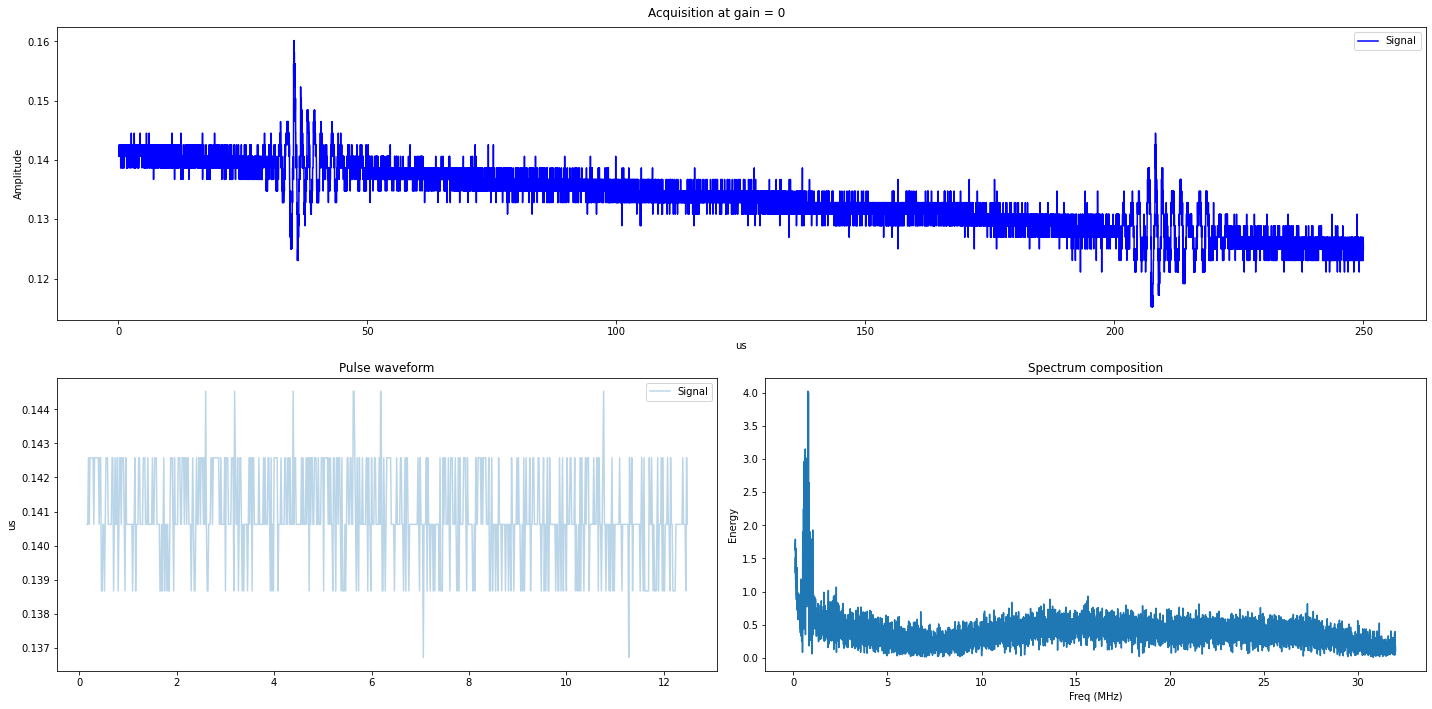

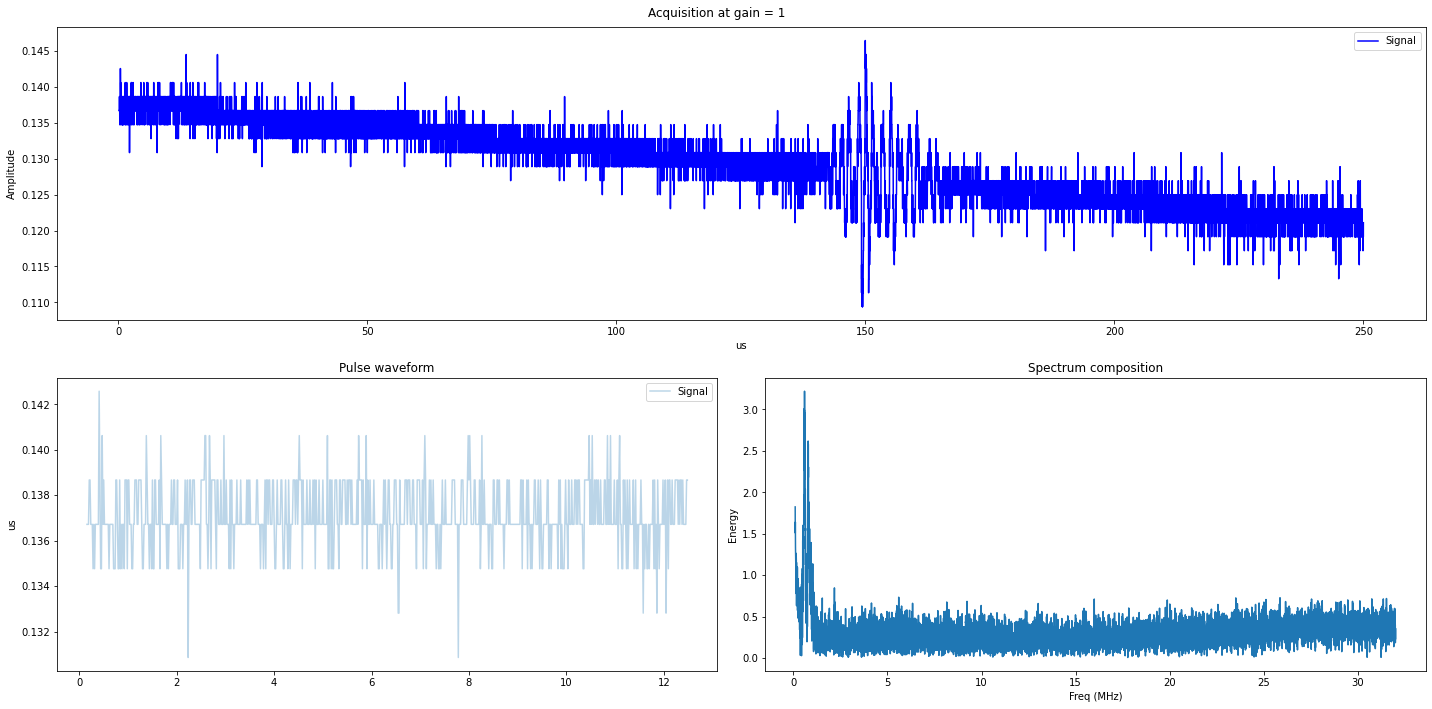

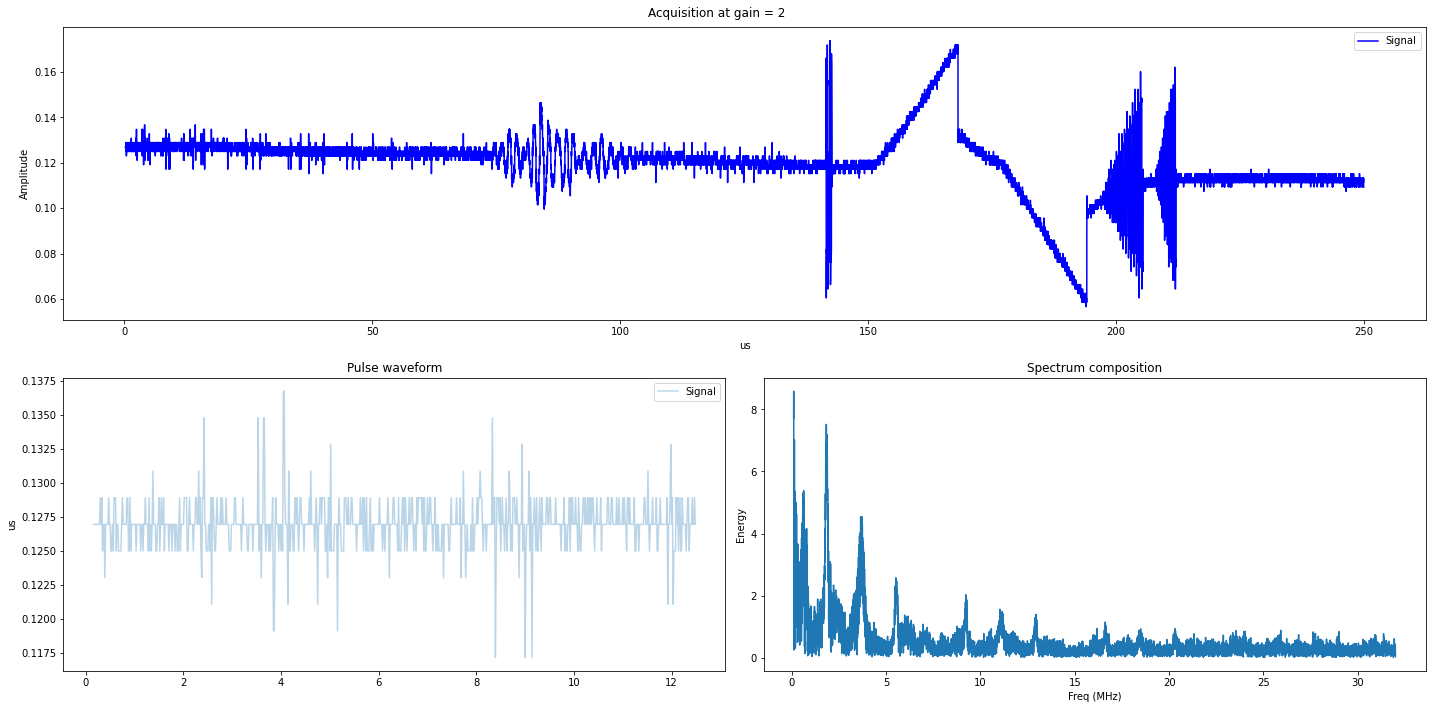

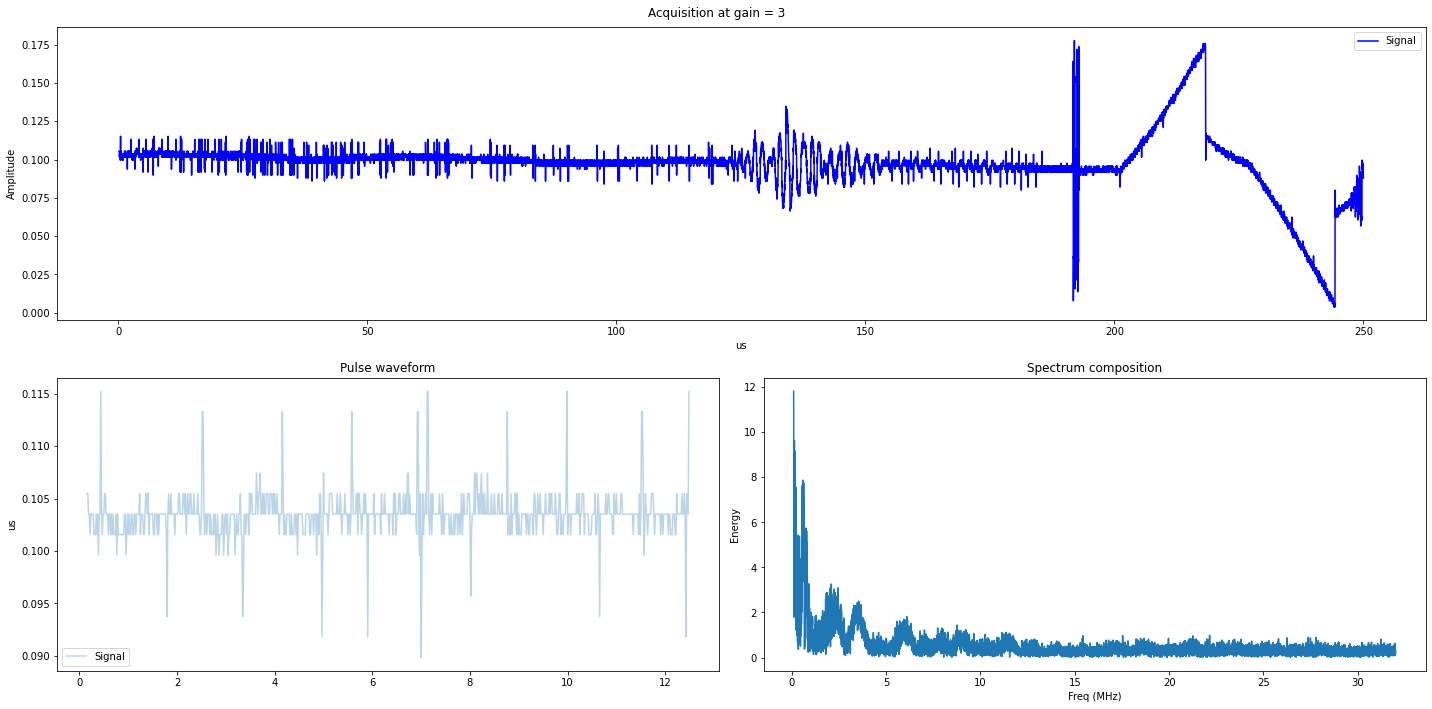

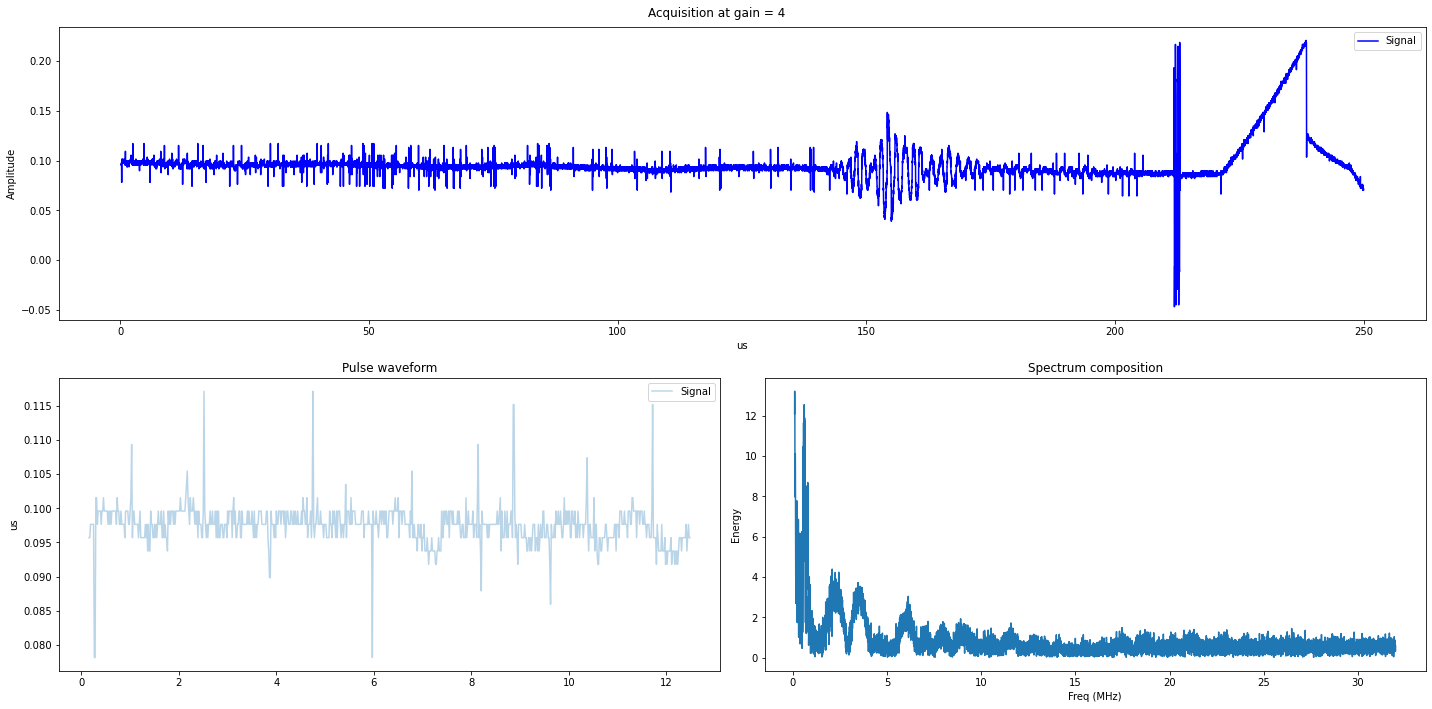

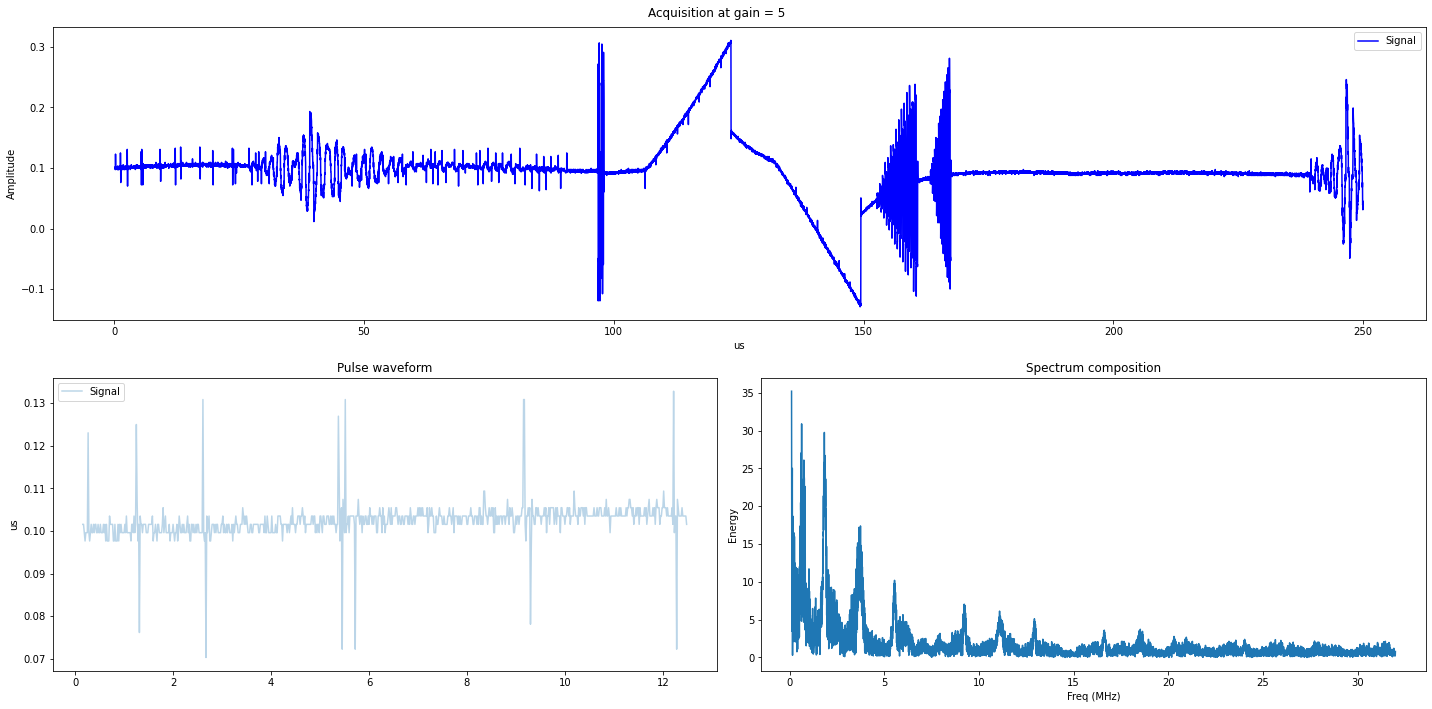

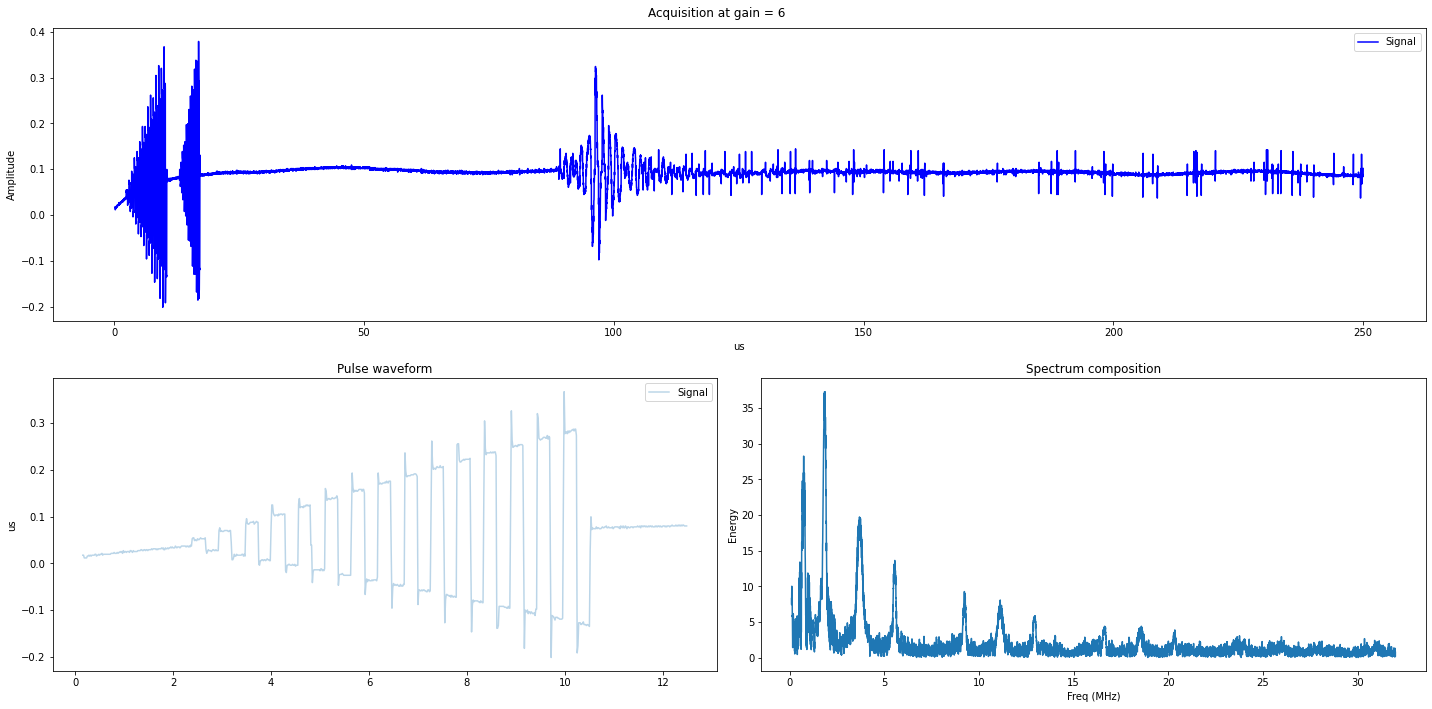

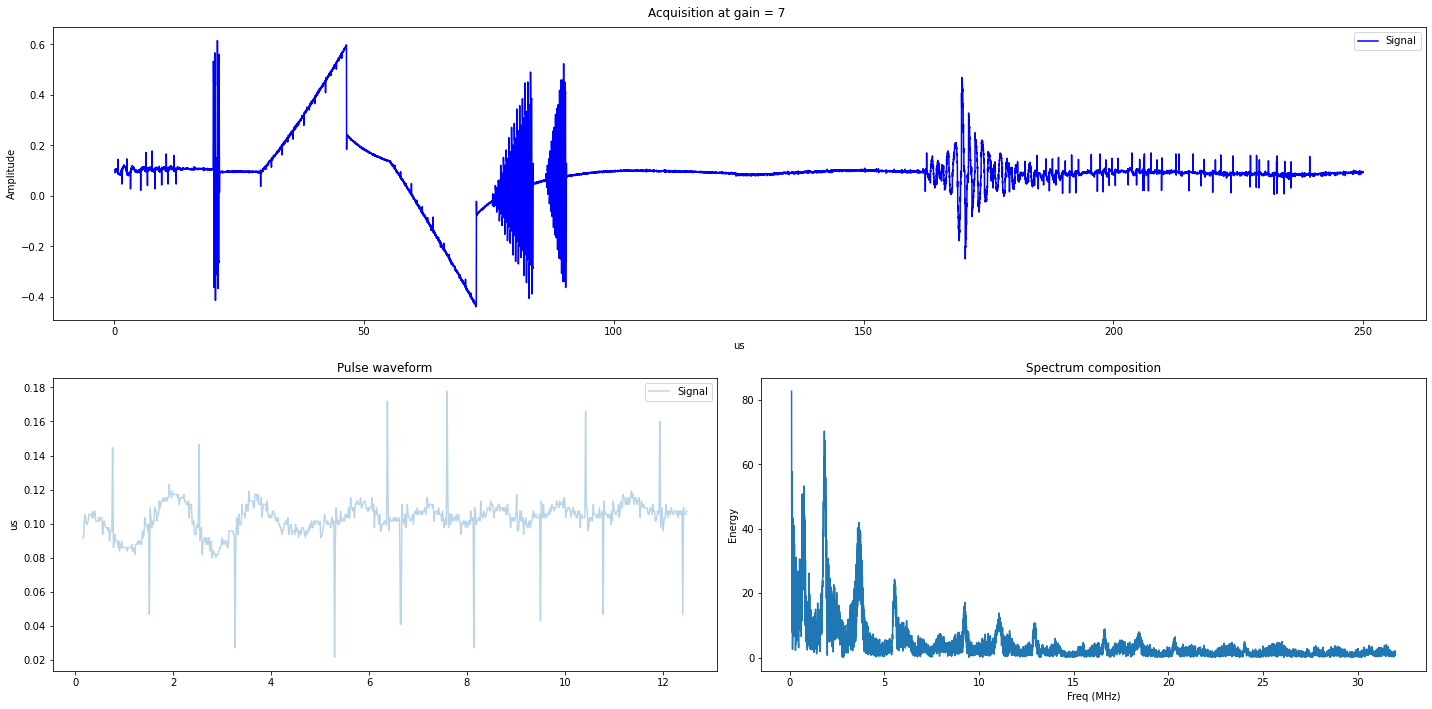

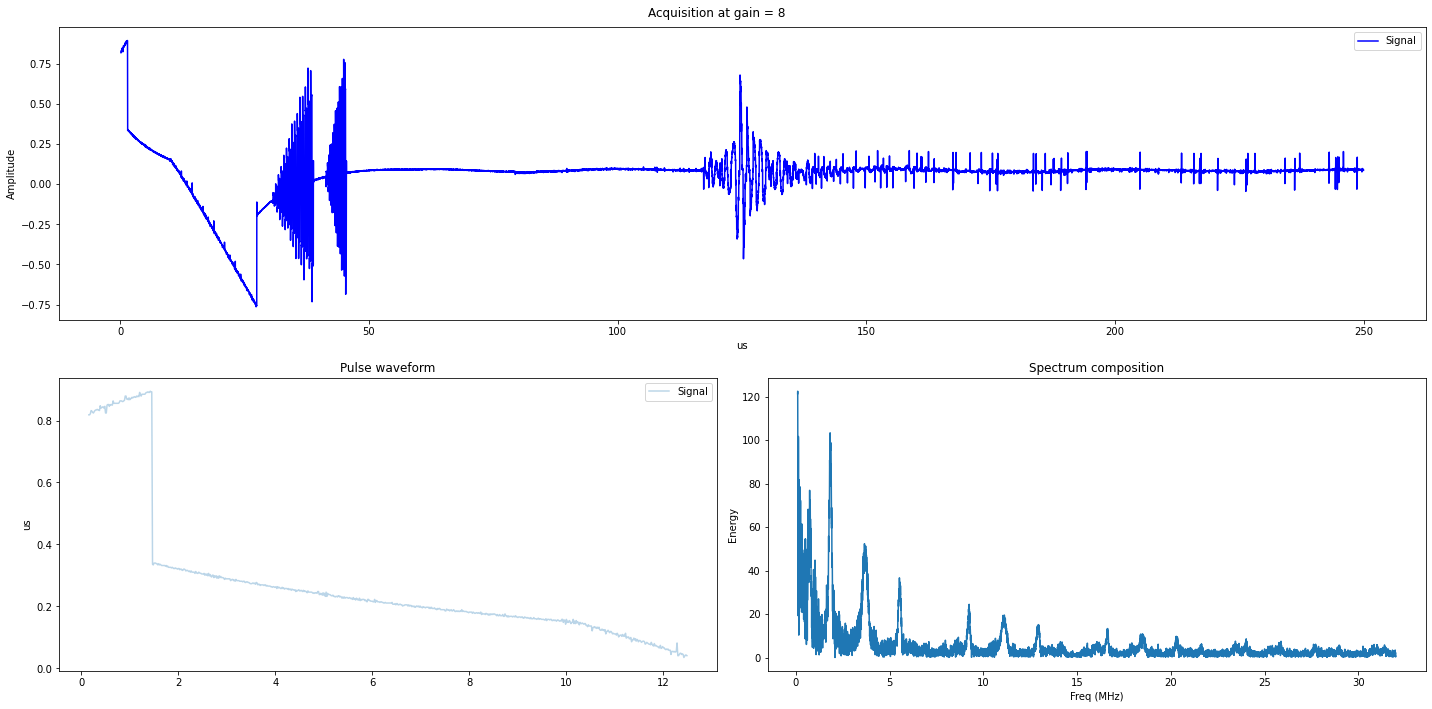

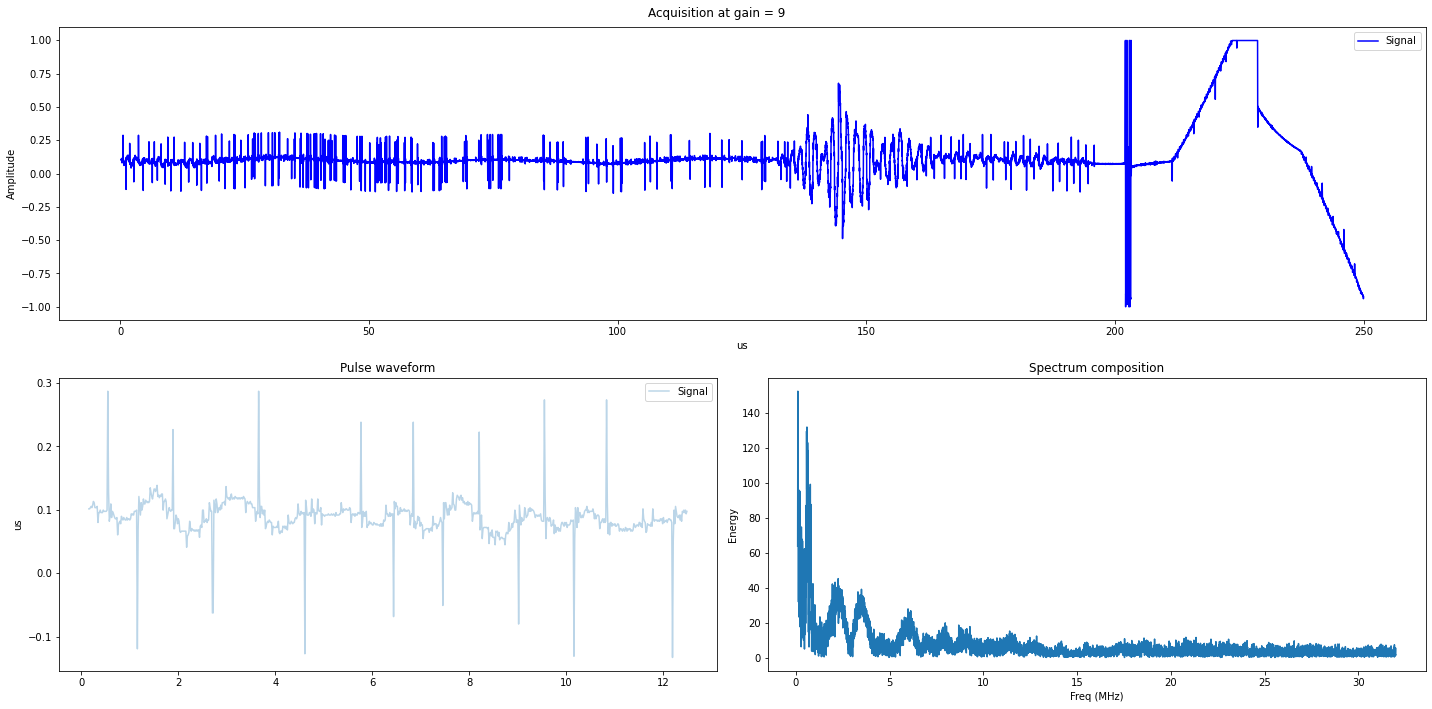

In [ ]:
for G in range (10):
    ser.write(bytearray(str(G),'ascii'))
    ser.write(bytearray('1','ascii'))
    A = ser.readline()
    B = ser.readline()
    C = ser.readline()
    assert C == b'----------Start of ACQ----------\r\n'
    F = []
    while True: # Run forever

        read_ser=ser.readline()
        if (read_ser != b''):
            F.append(read_ser)
        else:
            break
    print("Check: ",G,len(F[0]) == 64002)

    now = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
    S = str(F[0])[2:].split(",")[:-1]
    signal = [(int(x,16)-512)/512.0 for x in S]
    t = [x/64.0 for x in range(len(signal))]
    f = [k*64/len(signal) for k in range(len(signal))]

    data = {"signal":signal,"t":t,"f":f,"gain":G,"timestamp":now}

    m=800

    FFT = np.abs(np.fft.fft(signal))

    plt.figure(figsize=(20,10))
    plt.subplot(2, 1, 1)

    plt.plot(t[10:],signal[10:],"b",label="Signal")
    plt.xlabel("us")
    plt.ylabel("Amplitude")
    plt.legend()
    title = "Acquisition at gain = " + str(G)

    plt.subplot(2, 2, 3)
    plt.plot(t[10:m],signal[10:m],alpha=0.3,label="Signal")
    plt.title('Pulse waveform')
    plt.ylabel('V')
    plt.ylabel('us')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.title('Spectrum composition')
    plt.plot(f[25:len(FFT)//2],FFT[25:len(FFT)//2])
    plt.xlabel('Freq (MHz)')
    plt.ylabel('Energy')

    plt.suptitle(title)
    plt.tight_layout()
    plt.savefig("imgs/r2r/pic0gain_at_"+str(G)+".jpg")
    np.savez_compressed("imgs/r2r/pic0gain_at_"+str(G), **data )

# Aligning to model

17.3 points
270 ns for 1 periods
Freq: 3.699421965317919
Corrected freq: 15.907514450867051


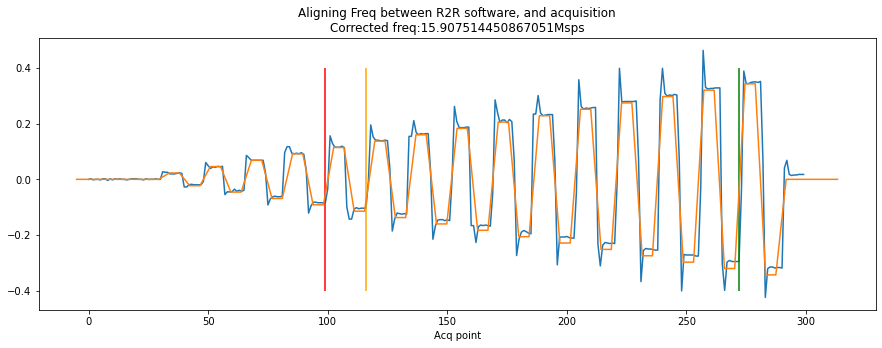

In [11]:
s = np.load("imgs/r2r/pic0gain_at_7.npz")["signal"]
t = np.load("imgs/r2r/pic0gain_at_7.npz")["t"]
plt.figure(figsize=(15,5))
plt.plot(s[5500:5800]-np.mean(s[5500:5510]))
plt.vlines(99,ymin=-0.4,ymax=0.4,colors=["red"])
plt.vlines(116,ymin=-0.4,ymax=0.4,colors=["orange"])
plt.vlines(272,ymin=-0.4,ymax=0.4,colors=["green"])
FACTOR = 4.3
plt.plot(4.3*np.array(range(1040-965))-5,(np.array(DATA[965:1040])-127)/350)

print((272-99)/10,"points")
T= t[5500+272]-t[5500+99]
print(int(T*100),"ns for 1 periods")
plt.xlabel("Acq point")
print("Freq:",1/(T/10.0)) #~16MHz
print("Corrected freq:",FACTOR/(T/10.0))

plt.title("Aligning Freq between R2R software, and acquisition\nCorrected freq:"+str(FACTOR/(T/10.0))+"Msps")
plt.savefig("r2r.jpg")

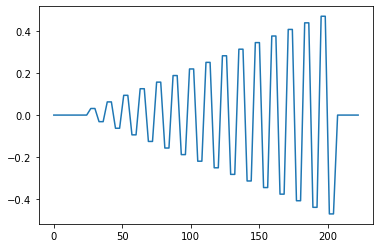